In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

%load_ext autoreload
%autoreload 1
%aimport notebook_utils

sns.set_context('notebook')
sns.set_style('white')

In [7]:
root = '/Users/primdal/lustre/pulling/predict_bipy/'
model_root = root + 'models/'
csv_path = model_root + '300K-tun-mol-seed-1-frac-train-1.0-performance.csv'
df = pd.read_csv(csv_path)
df.sort_values(by='holdout_loss', inplace=True)
df['rank'] = range(len(df))

In [8]:
!head $csv_path

basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,smoothing,upper_cutoff
recurrent_unit_lstm__n_nodes_8__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_2,95.0,0.80000000000000004,0.47187357693910598,extra_dense_False,0.833333333333,0.451934105406,lower_cutoff_1e-06,n_nodes_8,recurrent_unit_lstm,smoothing_2,upper_cutoff_0.1
recurrent_unit_lstm__n_nodes_10__extra_dense_True__upper_cutoff_2.0__lower_cutoff_1e-06__smoothing_2,96.0,0.8666666666666667,0.27366624834636849,extra_dense_True,0.933333333333,0.230735534367,lower_cutoff_1e-06,n_nodes_10,recurrent_unit_lstm,smoothing_2,upper_cutoff_2.0
recurrent_unit_gru__n_nodes_10__extra_dense_True__upper_cutoff_2.0__lower_cutoff_1e-06__smoothing_1,137.0,0.93333333333333324,0.2385202591617902,extra_dense_True,0.833333333333,0.38391591683,lower_cutoff_1e-06,n_nodes_10,recurrent_unit_gru,smoothing_1,upper_cutoff_2.0
recurrent_unit_gru__n_nodes_6__extra_dense_True__upp

In [6]:
df.head()

,basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,smoothing,upper_cutoff,rank
129,dropout_0.0,0.548096,recurrent_unit_lstm__n_nodes_20__extra_dense_T...,recurrent_dropout_0.0,extra_dense_True,0.766793,0.000000,lower_cutoff_1e-06,n_nodes_20,recurrent_unit_lstm,smoothing_1,upper_cutoff_0.1,0
38,recurrent_unit_gru__n_nodes_20__extra_dense_Fa...,81.000000,0.8666666666666667,0.24140539017195506,extra_dense_False,0.900000,0.174261,lower_cutoff_1e-06,n_nodes_20,recurrent_unit_gru,smoothing_1,upper_cutoff_2.0,1
104,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,145.000000,0.96666666666666656,0.22483113774408894,extra_dense_False,0.933333,0.183225,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,smoothing_1,upper_cutoff_0.1,2
145,recurrent_unit_gru__n_nodes_20__extra_dense_Fa...,66.000000,0.96666666666666656,0.1968500980176032,extra_dense_False,0.966667,0.191461,lower_cutoff_1e-06,n_nodes_20,recurrent_unit_gru,smoothing_2,upper_cutoff_2.0,3
25,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,121.000000,0.90000000000000002,0.28988491483032702,extra_dense_False,0.900000,0.218183,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,smoothing_5,upper_cutoff_2.0,4


# Get average performance per train frac

recurrent_unit_lstm__n_nodes_20__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_1
recurrent_unit_lstm__n_nodes_20__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_2
recurrent_unit_gru__n_nodes_20__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_1
recurrent_unit_lstm__n_nodes_20__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_2
recurrent_unit_gru__n_nodes_32__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_2
recurrent_unit_gru__n_nodes_20__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_1
recurrent_unit_gru__n_nodes_20__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_1
recurrent_unit_gru__n_nodes_20__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_2
recurrent_unit_gru__n_nodes_20__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-06__smoothing_1
recurrent_unit_gru__n_nodes_10__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-06__smoot

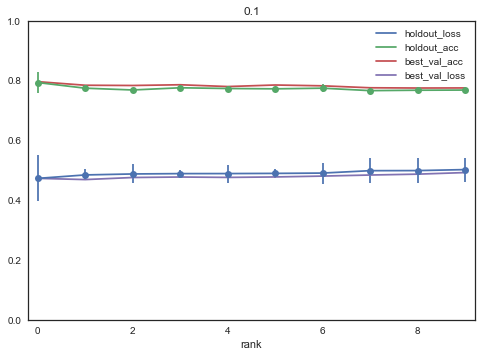

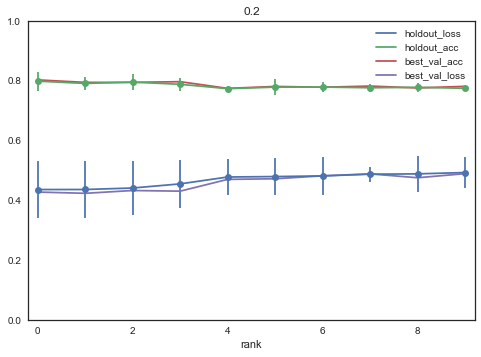

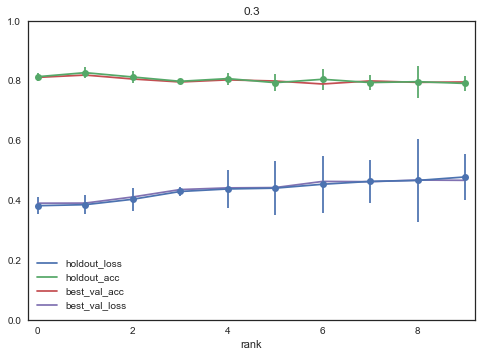

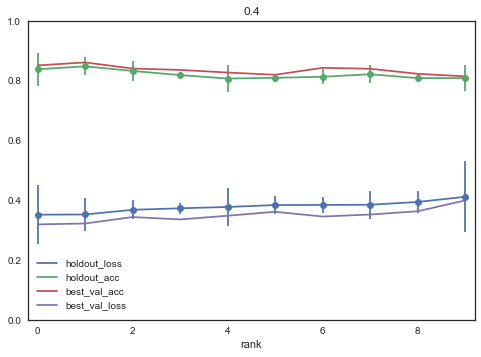

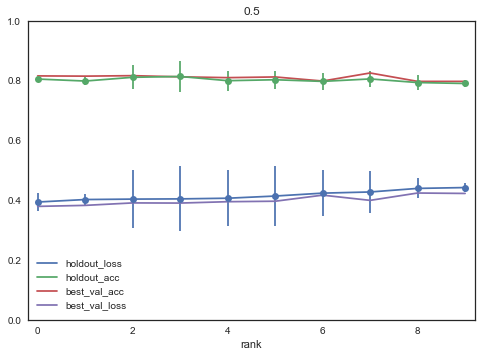

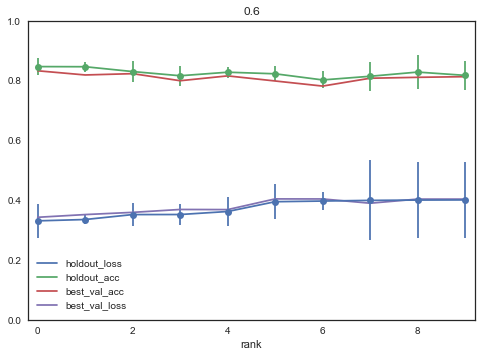

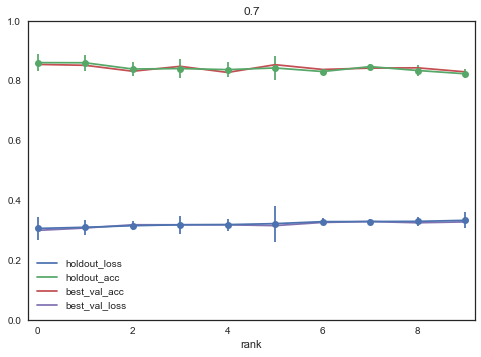

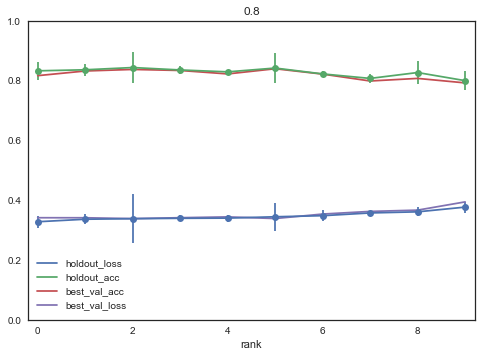

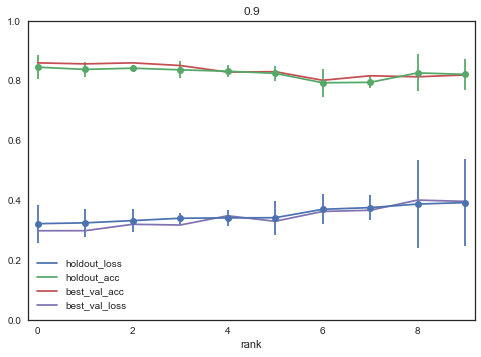

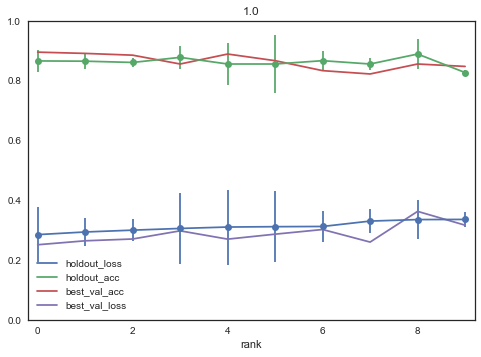

In [8]:
fracs = np.linspace(0.1, 1.0, num=10)
losses = []
losses_std = []
accs = []
accs_std = []
for frac in fracs:
    seeds = [1, 2, 3]
    csv_basename = '300K-tun-mol-seed-{}-frac-train-%s-performance.csv' % frac
    df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)
    notebook_utils.plot_ranked_performance(df_combined, title=frac, top=10)
    best_idx = df_combined.holdout_loss.idxmin()
    losses.append(df_combined.loc[best_idx, 'holdout_loss'])
    losses_std.append(df_combined.loc[best_idx, 'holdout_loss_std'])
    accs.append(df_combined.loc[best_idx, 'holdout_acc'])
    accs_std.append(df_combined.loc[best_idx, 'holdout_acc_std'])

    print(df_combined.loc[best_idx, 'basename'])

(0, 1)

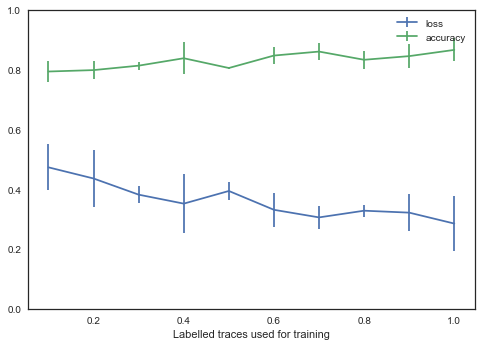

In [10]:
n_train = np.array(fracs)
plt.errorbar(n_train, losses, yerr=losses_std, label='loss')
plt.errorbar(n_train, accs, yerr=accs_std, label='accuracy')
plt.legend()
plt.xlabel('Labelled traces used for training')
plt.ylim([0, 1])

# Smoothing

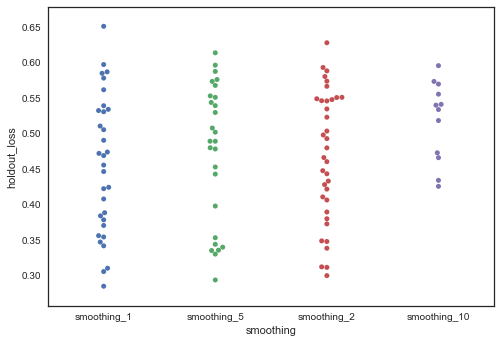

In [11]:
sns.swarmplot(data=df_combined, x='smoothing', y='holdout_loss')